#### Dada la serie, vuelos regulares en España desde Enero de 1995, con datos mensuales.

##### 1. Representar la serie y comentar el gráfico. ¿La serie es estacionaria? ¿Tiene tendencia? ¿Tiene comportamiento estacional? ¿Cuál es el periodo?

In [48]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("ggfortify") 
install.packages("knitr")
install.packages("forecast")

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'ggfortify' is in use and will not be installed"
Warning message:
"package 'knitr' is in use and will not be installed"
Installing package into 'C:/Users/fdrs1/OneDrive/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'forecast' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'forecast'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\fdrs1\OneDrive\Documents\R\win-library\4.0\00LOCK\forecast\libs\x64\forecast.dll to C:\Users\fdrs1\OneDrive\Documents\R\win-library\4.0\forecast\libs\x64\forecast.dll: Permission denied"
Warning message:
"restored 'forecast'"



The downloaded binary packages are in
	C:\Users\fdrs1\AppData\Local\Temp\Rtmp6talIa\downloaded_packages


In [49]:
library(readxl)
library(ggplot2)
library(ggfortify)
library(knitr)
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Registered S3 methods overwritten by 'forecast':
  method                 from     
  autoplot.Arima         ggfortify
  autoplot.acf           ggfortify
  autoplot.ar            ggfortify
  autoplot.bats          ggfortify
  autoplot.decomposed.ts ggfortify
  autoplot.ets           ggfortify
  autoplot.forecast      ggfortify
  autoplot.stl           ggfortify
  autoplot.ts            ggfortify
  fitted.ar              ggfortify
  fortify.ts             ggfortify
  residuals.ar           ggfortify



In [142]:
DATOS_vuelos<- read_excel("C:/Users/fdrs1/Dropbox/21-Learning/Máster Big Data y Business Analytics/8. Minería de datos y modelización predictiva/3.- Práctica Juana/Ejercicios Series/VUELOS.xlsx")
df_datos<-as.data.frame(DATOS_vuelos)
#rownames(df_datos)<-df_datos[,1]
#dat_vuelos<-df_datos[,-1]
head(DATOS_vuelos)
head(dat_vuelos)

MES,Vuelos
<chr>,<dbl>
1995M01,53180
1995M02,48647
1995M03,55353
1995M04,56751
1995M05,59487
1995M06,59137


[1] 53180 48647 55353 56751 59487 59137

Vamos  analizar que tenemos todos los datos con la frecuencia indicada.Para eso
vuelos regulares en España desde Enero de 1995, con datos mensuales.
Creamos el fichero TS(time series) ene la que indicamos la frecuencia y el punto de origen. 


In [143]:
#al fichero inicial le quitamos la primera columna que se ha transfomado en etiquetas
vuelos.ts = ts(dat_vuelos, start = c(1995,1), frequency = 12)
print(vuelos.ts)

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1995  53180  48647  55353  56751  59487  59137  62845  61095  60703  60308
1996  59419  55395  60810  63665  68339  66990  72901  71251  70301  70064
1997  69608  64431  72808  74916  76890  75590  80421  78891  78501  76996
1998  73832  68423  77272  79025  81160  81142  86167  83308  81208  81664
1999  77725  73077  84179  84428  89513  90193  97233  97035  95928  95620
2000  86998  88033  96315  98035 104147 102572 108701 107083 105084 105452
2001  97892  91645 103488 106207 111128 108993 115799 114604 112300 110102
2002  90817  85524  96355 100625 106009 101366 110518 109942 106290 106703
2003  98751  92157 104329 106924 112186 112275 119822 119468 115635 115633
2004 105011 104263 115883 116930 123728 123466 130310 130879 127587 127193
2005 115960 112068 126577 130673 137869 137953 146037 144028 139990 138113
2006 125439 119340 135173 135180 144852 144358 148728 151331 145886 147034
2007 134549 128224 147110

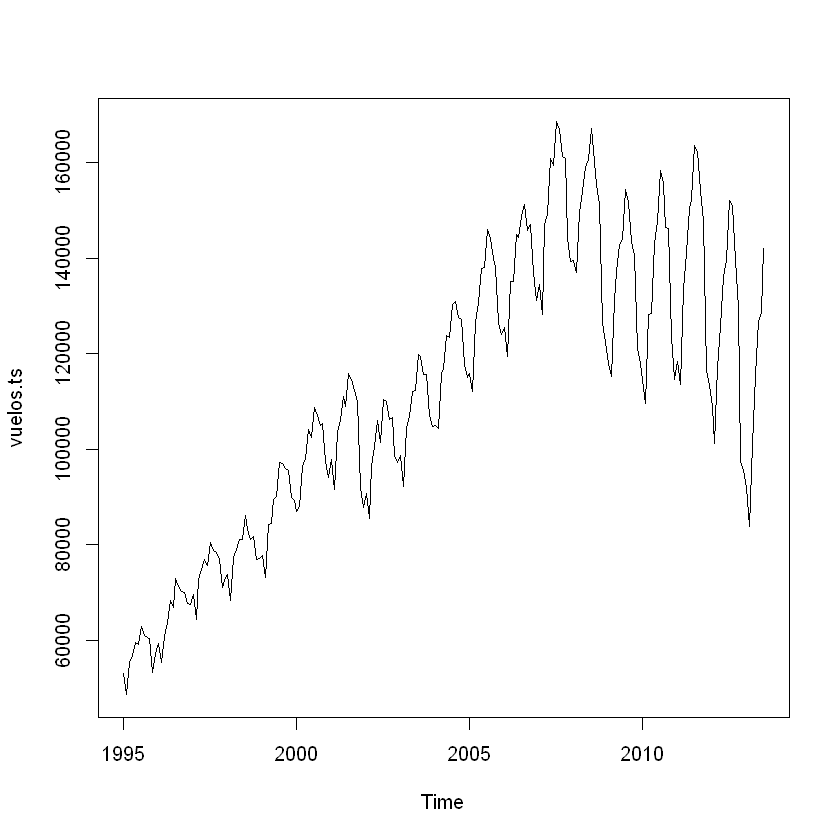

In [5]:
plot(vuelos.ts)

Warning message:
"Ignoring unknown parameters: ts.colour, title"


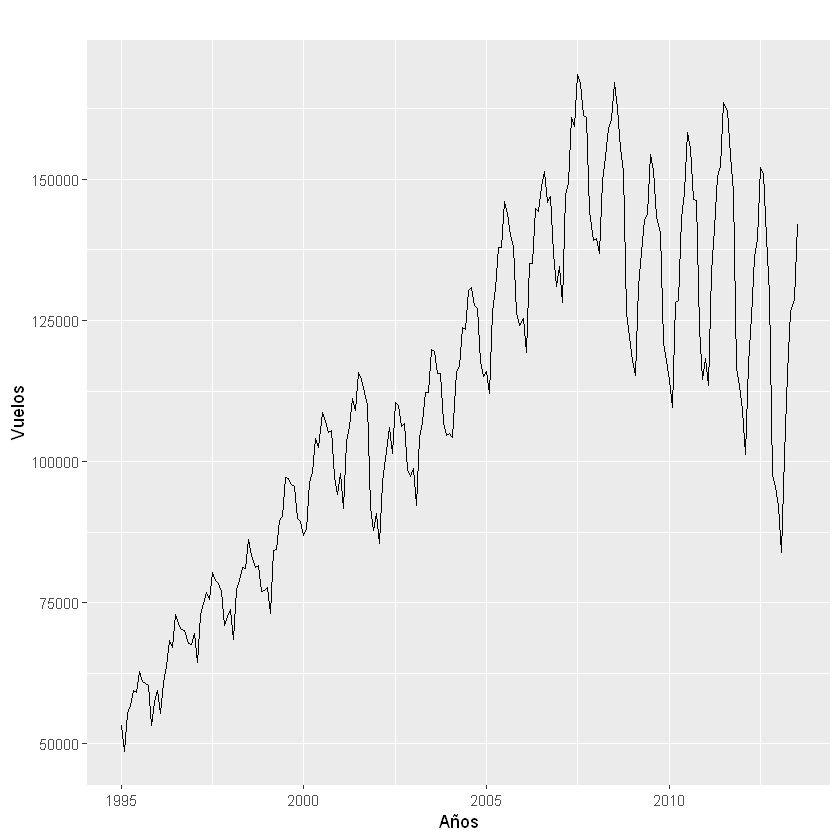

In [145]:
ggplot2::autoplot(vuelos.ts, ts.colour = 'blue', title = "número vuelos mensuales", xlab = "Años", ylab="Vuelos") 

Warning message:
"Ignoring unknown parameters: ts.colour"


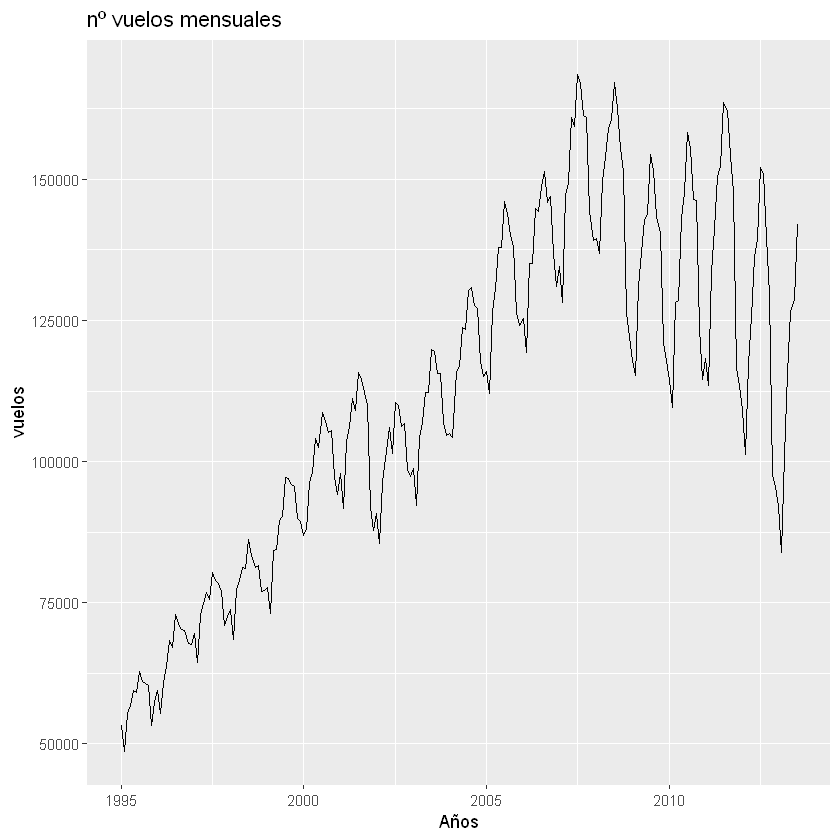

In [146]:
ggplot2::autoplot(vuelos.ts,ts.colour = 'blue') + 
ggtitle("nº vuelos mensuales") + 
xlab("Años") + 
ylab("vuelos") 

**¿La serie es estacionaria?** No, porque no tiene media constante.Una serie es estacionaria cuando es estable a lo largo del tiempo, es decir, cuando la media y varianza son constantes en el tiempo.

**¿Tiene tendencia(trend,T)?** Sí,va cambiando, primero creciente y luego decreciente

**¿Tiene comportamiento estacional(seasonal,S)?** Sí , tiene el mismo comportamiento cada periodo.

**¿Cuál es el periodo(Cyclic,C)?** parece de 12 meses, anual.

Nota:If the fluctuations are not of a fixed frequency then they are cyclic. if the frequency is unchanging and associated with some aspect of the calendar, then the pattern is seasonal.

#### 2. Calcular los coeficientes de estacionalidad y su representación junto con la componente irregular.¿Qué mes tiene un coeficiente mayor?¿Qué significa?¿Cuál es el mes que tiene menor?¿Cuál es su significado?

In [25]:
vuelos.ts_comp<-decompose(vuelos.ts, type=c("multiplicative"))
# En el modelo aditivo los coeficientes de estacionalidad no son interpretables

In [42]:
knitr::kable(vuelos.ts_comp$figure, digits = 2, caption = "Coef Estacionalidad")
vuelos.ts_comp$seasonal
vuelos.ts_comp$trend
vuelos.ts_comp$remainder#no aparece
vuelos.ts_comp$data#no aparece

En julio la estacionalidad es un 11% más que la media del año



Table: Coef Estacionalidad

|    x|
|----:|
| 0.91|
| 0.87|
| 0.98|
| 1.00|
| 1.05|
| 1.05|
| 1.11|
| 1.10|
| 1.06|
| 1.04|
| 0.92|
| 0.90|

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
1996,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
1997,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
1998,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
1999,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
2000,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
2001,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
2002,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
2003,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684
2004,0.9061825,0.8667772,0.9761136,0.9993279,1.0541767,1.0493213,1.1148466,1.0988051,1.0606002,1.0444212,0.9247592,0.9046684


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1995,NA,NA,NA,NA,NA,NA,57597.96,58139.08,58647.62,59163.08,59820.00,60516.04
1996,61262.25,62104.42,62927.50,63733.92,64741.29,65773.46,66629.29,67430.33,68306.75,69275.46,70100.54,70815.17
1997,71486.83,72118.50,72778.50,73409.00,73835.88,74182.46,74567.00,74909.33,75261.67,75618.88,75968.00,76377.25
1998,76848.00,77271.46,77568.29,77875.58,78318.71,78755.63,79106.12,79462.25,79943.96,80456.88,81030.04,81755.21
1999,82593.42,83626.46,84811.75,86006.58,87129.83,88179.79,89074.38,90083.92,91212.75,92285.37,93462.08,94587.62
2000,95581.25,96477.75,97277.92,98069.08,98787.75,99298.29,99953.75,100558.17,101007.54,101646.92,102278.29,102836.71
2001,103400.00,104009.12,104623.17,105117.58,105083.75,104589.46,104027.96,103478.12,102925.88,102396.08,101950.21,101419.12
2002,100881.29,100467.00,100022.33,99630.29,99768.88,100448.21,101177.92,101784.87,102393.50,102988.21,103508.04,104219.96
2003,105062.17,105846.75,106633.04,107394.50,108112.46,108764.87,109332.25,110097.50,111083.33,111981.67,112879.50,113826.71
2004,114730.00,115642.46,116615.92,117595.58,118522.21,119398.88,120286.79,121068.21,121839.00,122857.21,124019.04,125211.88


NULL

NULL

#### 3. Representar la serie, la componente estacional, la estimación de la tendencia y el error. ¿Qué dirías sobre la tendencia del número de vuelos en los últimos cuatro años? ¿Y sobre su comportamiento estacional?

Warning message:
"attributes are not identical across measure variables;
they will be dropped"
Warning message:
"Removed 24 row(s) containing missing values (geom_path)."


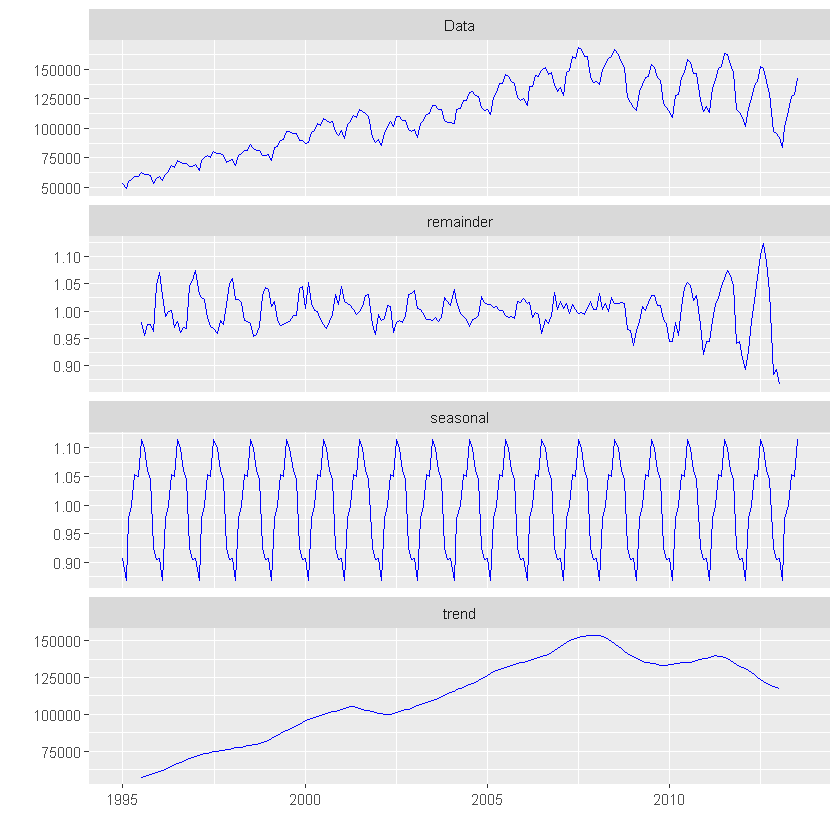

In [27]:
autoplot(vuelos.ts_comp,ts.colour = 'blue' )

En los últimos cuatro años la tendencia ha disminuido. Su comportamiento estacional es muy marcado.

#### 4. Representar sobre la serie de vuelos original, la tendencia calculada con la descomposición y la serie ajustada estacionalmente. ¿Cómo se calcula la serie ajustada estacionalmente? 

Warning message:
"Removed 12 row(s) containing missing values (geom_path)."


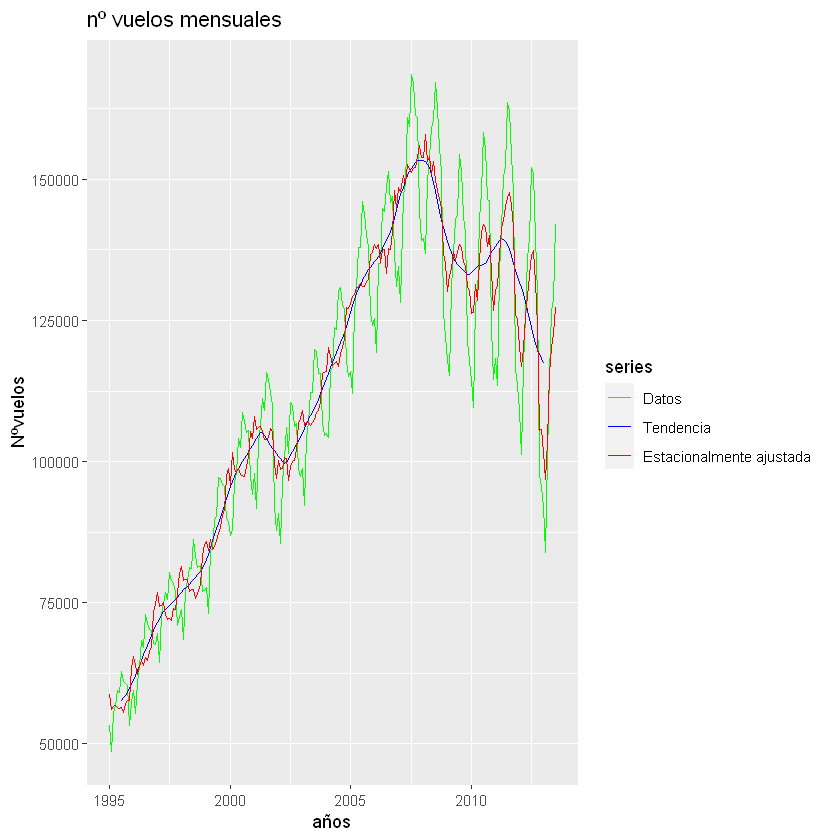

In [69]:
autoplot(vuelos.ts, series = "Datos")+#esta va sin descomponer
    autolayer(trendcycle(vuelos.ts_comp), series="Tendencia")+
    autolayer(seasadj(vuelos.ts_comp),series="Estacionalmente ajustada")+
    xlab("años") +
    ylab("Nºvuelos")+
    ggtitle("nº vuelos mensuales")+
    scale_colour_manual(values= c("green","blue","red"),breaks=c("Datos","Tendencia","Estacionalmente ajustada"))

Se calcula dividiendo el mes por el perido de estacionalidad, así disminuyemos su efecto, pues va a disminuir (o aumentar)

#### 5. Representar las series de cada año ¿En que año hubo más vuelos?


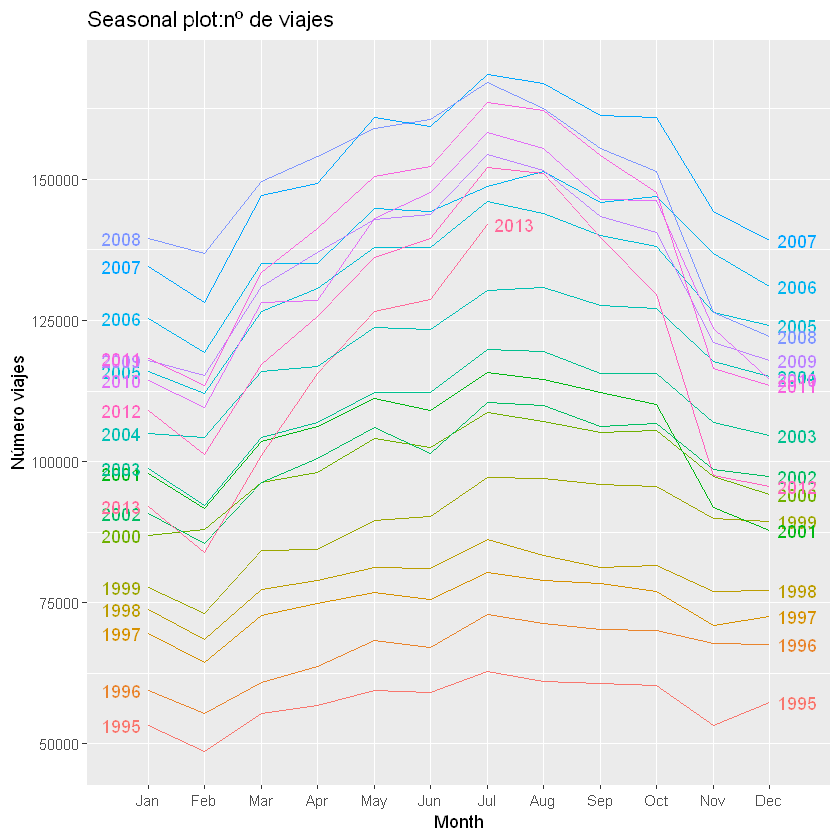

In [73]:
ggseasonplot(vuelos.ts, year.labels=TRUE,year.labels.left=TRUE)+
ylab("Número viajes")+
ggtitle("Seasonal plot:nº de viajes")

#### 6. Para comprobar la eficacia de los métodos de predicción que vamos a hacer en los siguientes apartados sobre el fichero Vuelos_TR eliminando de Vuelos los últimos datos observados (un periodo en las series estacionales o aproximadamente 10 observaciones). Estos últimos valores se reservan para comparar con las predicciones realizadas por cada uno de los métodos. Luego ajustamos los modelos sobre la serie sin esos últimos datos en los siguientes apartados 

In [128]:
#se reservan los valores del último año para comparar predicciones
vuelos.ts_train <- window(vuelos.ts, end=c(2012,7))

#### 7. Encontrar el modelo de suavizado exponencial más adecuado. Para dicho modelo, representar gráficamente la serie observada y la suavizada con las predicciones para un periodo que se considere adecuado. Mostrar una tabla con las prediciones

In [129]:
vuelos.ts_S1=ses(vuelos.ts_train, h = 100)#modelo simple

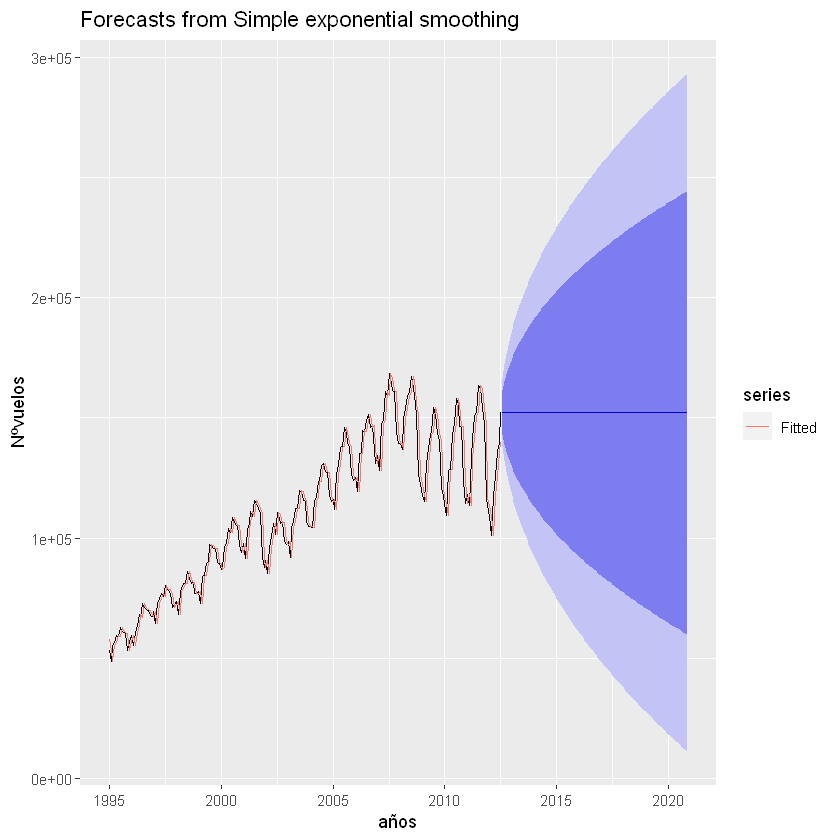

In [130]:
autoplot(vuelos.ts_S1)+
    autolayer(fitted(vuelos.ts_S1), series= "Fitted")+
    xlab("años") +
    ylab("Nºvuelos")

In [131]:
#la predicción es una constante y por eso no es fiable
#Probamos con el alisado doble de holt
vuelos.ts_S2=holt(vuelos.ts_train, h = 9)#modelo holt

In [132]:
print(vuelos.ts_S2)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Aug 2012       159372.7 149913.6 168831.8 144906.19 173839.2
Sep 2012       167802.0 151706.9 183897.2 143186.62 192417.4
Oct 2012       176231.3 150921.2 201541.5 137522.77 214939.9
Nov 2012       184660.7 148343.8 220977.6 129118.74 240202.6
Dec 2012       193090.0 144317.2 241862.8 118498.48 267681.5
Jan 2013       201519.3 139029.4 264009.3 105949.26 297089.4
Feb 2013       209948.7 132603.2 287294.2  91658.95 328238.4
Mar 2013       218378.0 125127.9 311628.1  75764.29 360991.7
Apr 2013       226807.3 116673.1 336941.5  58371.60 395243.1


In [133]:
#para ver los parámtros del modelo del alisado de holt
vuelos.ts_S2[["model"]]

Holt's method 

Call:
 holt(y = vuelos.ts_train, h = 9) 

  Smoothing parameters:
    alpha = 0.6883 
    beta  = 0.6883 

  Initial states:
    l = 52421.9004 
    b = 1183.8295 

  sigma:  7381.002

     AIC     AICc      BIC 
4893.816 4894.109 4910.575 

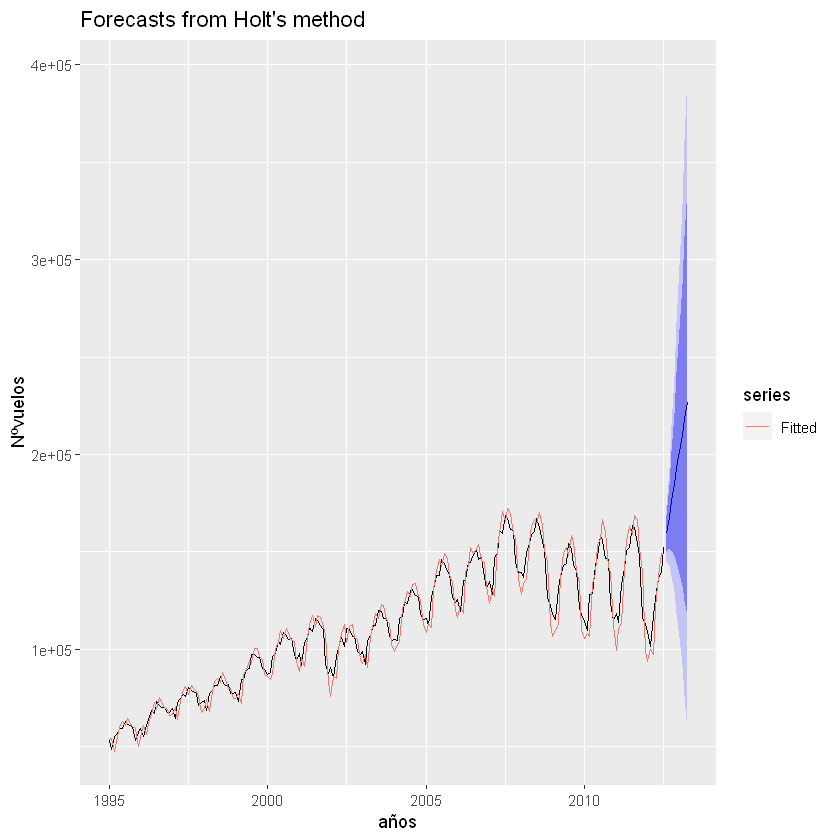

In [134]:
autoplot(vuelos.ts_S2)+
    autolayer(fitted(vuelos.ts_S2), series= "Fitted")+
    xlab("años") +
    ylab("Nºvuelos")

In [138]:
vuelos.ts_S3=hw(vuelos.ts_train,seasonal="multiplicative", h = 12,level =c(80,95))#Modelo de Holt-Winters con estacionalidad 

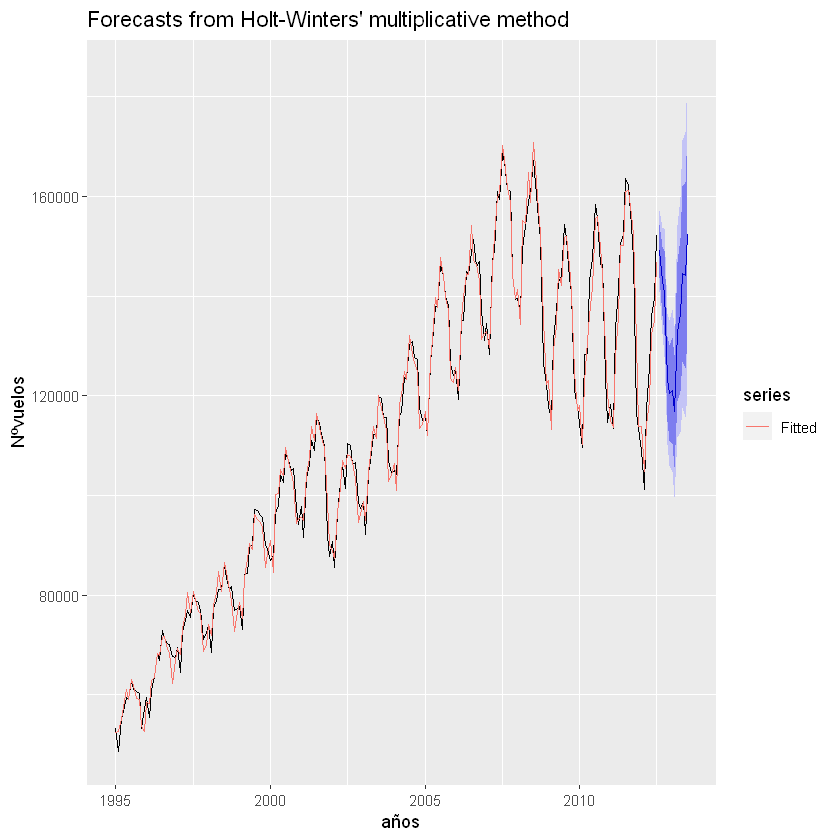

In [139]:
autoplot(vuelos.ts_S3)+
    autolayer(fitted(vuelos.ts_S3), series= "Fitted")+
    xlab("años") +
    ylab("Nºvuelos")

In [140]:
#para ver las predicciones hacemos un print de los valores de suavizado calculados
print(vuelos.ts_S3)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Aug 2012       149089.0 143807.9 154370.0 141012.34 157165.6
Sep 2012       143101.7 136175.2 150028.2 132508.58 153694.9
Oct 2012       140710.7 132356.8 149064.7 127934.48 153487.0
Nov 2012       123350.5 114800.6 131900.4 110274.58 136426.5
Dec 2012       120509.0 111031.1 129986.9 106013.73 135004.2
Jan 2013       121119.4 110510.1 131728.6 104893.96 137344.8
Feb 2013       116771.7 105529.5 128013.9  99578.25 133965.1
Mar 2013       132834.3 118916.1 146752.5 111548.30 154120.4
Apr 2013       136214.2 120800.0 151628.5 112640.18 159788.3
May 2013       144462.8 126915.6 162010.1 117626.63 171299.1
Jun 2013       144155.2 125455.4 162855.1 115556.24 172754.2
Jul 2013       152368.1 131349.0 173387.2 120222.18 184514.0


In [141]:
#los parámetros del modelo
vuelos.ts_S3[["model"]]

Holt-Winters' multiplicative method 

Call:
 hw(y = vuelos.ts_train, h = 12, seasonal = "multiplicative",  

 Call:
     level = c(80, 95)) 

  Smoothing parameters:
    alpha = 0.8919 
    beta  = 0.0392 
    gamma = 0.0759 

  Initial states:
    l = 57629.3917 
    b = 695.8835 
    s = 0.8834 0.9025 1.0212 1.0561 1.0976 1.1222
           1.0604 1.0794 1.0129 0.9816 0.8819 0.9008

  sigma:  0.0276

     AIC     AICc      BIC 
4517.387 4520.558 4574.368 